In [1]:
import json
import time
import matplotlib.pyplot as plt
from squirrel_search import squirrel_search, fitness
from polynomial_calculator import polynomial_calc

### Data

In [2]:
dir_path = "./data/"

In [3]:
with open(dir_path+"data3.json", 'r+') as f:
    data = json.load(f)

### Squirrel Search

In [4]:
start = time.time()
result, evolution = squirrel_search(fitness, data, num_of_iters=500, num_of_dims=len(data['coefs']), FS_l=-1, FS_u=1)
finish = time.time()-start
print("Duration: ", finish//60, "m ", finish-(finish//60)*60, "s")

Duration:  17.0 m  57.61568474769592 s


### Results

In [5]:
print("Final fitness: ", result.fit)
print("Approximated coefficients: ", result.pos)

Final fitness:  1.5543675682020432e+71
Approximated coefficients:  [0.2530735511570087, 0.6437360290889981, 0.046624173882432174, -0.7992925398047744, -0.7562368139884054, 0.19679467132912387, 0.031562134005452123, 0.15940599277043285, -0.4852308137638256, 0.6227485721506064, -0.5472072174687999, -0.5636689223309339, -0.5867848742303355, 0.00029122275233452627, -0.6475910280600546, 0.7045501873286919, -0.557420266369864, 0.6094876855562125, 0.18195376916629868, -0.8111203611286342, -0.004698962932964352, 0.1906111560382078, 0.07387633039593122, 0.5960405218464386, 0.5448499851064974]


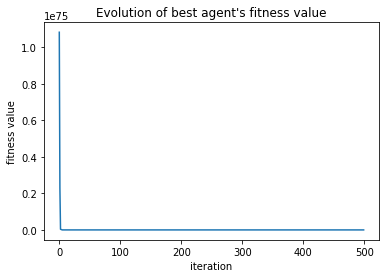

In [6]:
plt.plot(evolution)
plt.xlabel('iteration')
plt.ylabel('fitness value')
plt.title("Evolution of best agent's fitness value")
plt.show()

In [7]:
# calculate y values with new approximated coefficients
approximated_y = []

for x in data['x']:
    approximated_y.append(polynomial_calc(result.pos, x))

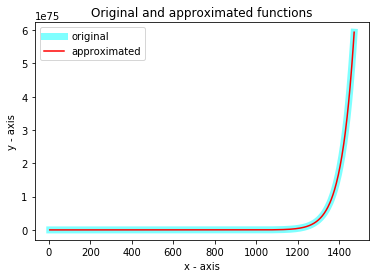

In [45]:
plt.plot(data["x"], data["y"], label = "original", linewidth=7, alpha=0.5, color="cyan")
plt.plot(data["x"], approximated_y, label = "approximated", color="red")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.legend()
plt.title("Original and approximated functions")
plt.show()

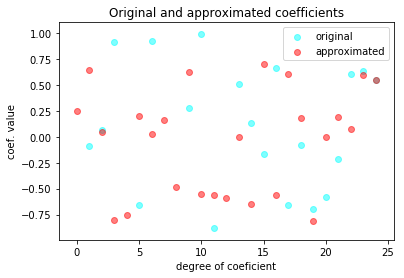

In [46]:
plot_data = (data["coefs"], result.pos)
colors = ("cyan", "red")
groups = ("original", "approximated")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for plot_data, color, group in zip(plot_data, colors, groups):
    x = range(len(plot_data))
    y = plot_data
    ax.scatter(x, y, alpha=0.5, c=color, label=group)

plt.xlabel('degree of coeficient')
plt.ylabel('coef. value')
plt.title('Original and approximated coefficients')
plt.legend()
plt.show()